# Final Results - EUCHEMS 2018

In [3]:
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
# from keras.layers import Merge
from keras.layers import Conv1D,Reshape
from keras.layers import LSTM
import keras

# For the plots
import matplotlib.pyplot as plt

# For controlling the training parameters in the midst of training itself
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# For creating directory to save the models
import os
from imblearn.over_sampling import SMOTE

from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical   


import turicreate as tc


In [5]:
# make this cell work acc to the new api
# from keras.layers import Merge

In [6]:
# Load the data
X = np.load("X_reg.npy")
Y = np.load("Y_reg.npy")

Y = np.log10(Y)


from sklearn.preprocessing import RobustScaler

sc_y = RobustScaler().fit(Y.reshape(-1, 1))
Y = sc_y.transform(Y.reshape(-1, 1))
Y = Y.reshape(-1,)

TypeError: 'tuple' object is not callable

In [14]:
SY =  tc.SArray(Y)
# SY.show()

In [15]:
# type(SY)

turicreate.data_structures.sarray.SArray

# Normal Regression

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
dataY_train =  tc.SArray(Y_train.tolist())
dataX_train = tc.SArray(X_train.tolist())
data_train = tc.SFrame()
data_train = data_train.add_column(dataX_train,'X')
data_train = data_train.add_column(dataY_train,'Soluble')

dataY_test =  tc.SArray(Y_test.tolist())
dataX_test = tc.SArray(X_test.tolist())
data_test = tc.SFrame()
data_test = data_test.add_column(dataX_test,'X')
data_test = data_test.add_column(dataY_test,'Soluble')

# train_data, test_data = data.random_split(0.8)

reg_model = tc.boosted_trees_regression.create(data_train, target='Soluble',features = ['X'],max_iterations = 600)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 2463

Number of features          : 1

Number of unpacked features : 101

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.078406     | 3.827802           | 3.090068             | 0.777390      | 0.845297        |

| 2         | 0.114883     | 3.202163           | 2.762130             | 0.631311      | 0.723918        |

| 3         | 0.142867     | 2.619628           | 2.577476             | 0.534786      | 0.648008        |

| 4         | 0.167236     | 2.263177           | 2.450784             | 0.467599      | 0.606371        |

| 5         | 0.192596     | 1.977732           | 2.404569             | 0.420160      | 0.581564        |

| 6         | 0.215050     | 1.908150           | 2.227062             | 0.386611      | 0.560558        |

| 11        | 0.303758     | 1.489045           | 1.964757             | 0.295201      | 0.537336        |

| 50        | 0.885603     | 0.400364           | 1.893130             | 0.080589      | 0.532247        |

| 51        | 0.909656     | 0.399986           | 1.878790             | 0.078800      | 0.531560        |

| 100       | 1.638984     | 0.131480           | 1.858947             | 0.020730      | 0.533645        |

| 101       | 1.663875     | 0.130425           | 1.858814             | 0.020188      | 0.533775        |

| 150       | 2.499336     | 0.113759           | 1.859433             | 0.005820      | 0.533534        |

| 200       | 3.051906     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 250       | 3.210312     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 300       | 3.366040     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 350       | 3.525909     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 400       | 3.685533     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 450       | 3.896477     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 500       | 4.096378     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 501       | 4.101359     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 550       | 4.275018     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

| 600       | 4.433999     | 0.113566           | 1.856717             | 0.003687      | 0.533659        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

In [18]:
# reg_model.evaluate(data_test)
import sklearn
from math import sqrt
predictions = reg_model.predict(data_test)
pred = predictions
act = list(data_test['Soluble'])
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.6252320480598499
Mean Absolute Error (in g/litre):  0.3104500196566265
Root Mean Squared Error (in g/litre):  1.1244702073383657


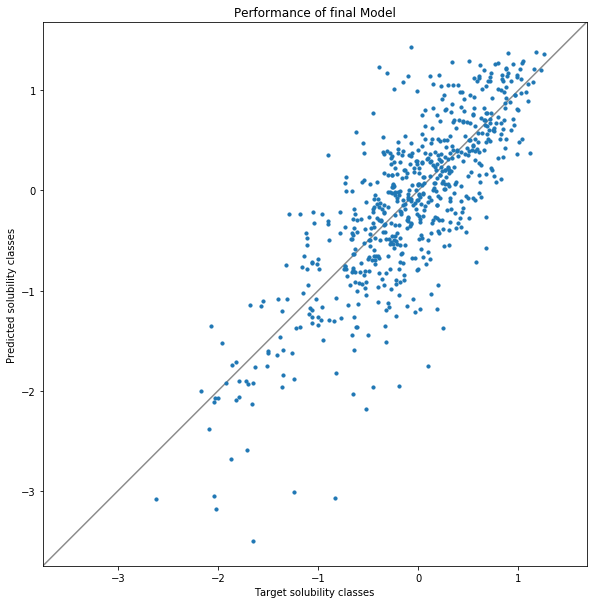

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred,act,s=10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [110]:
lin_reg_model = tc.linear_regression.create(data_train, target='Soluble',features = ['X'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2438

Number of features          : 1

Number of unpacked features : 101

Number of coefficients    : 102

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.112443     | 2.856891           | 2.148564             | 0.548878      | 0.535059        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [112]:
import sklearn
from math import sqrt
predictions = lin_reg_model.predict(data_test)
pred = predictions
act = list(data_test['Soluble'])
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.525234390977
Mean Absolute Error (in g/litre):  0.354574459979
Root Mean Squared Error (in g/litre):  1.3486846946082123


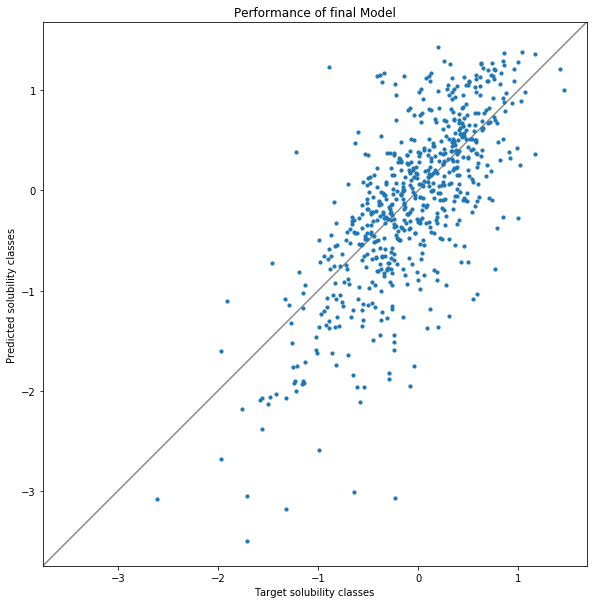

In [113]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred,act,s=10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# Simple Dense Network

In [19]:
X_train = X_train.reshape((X_train.shape[0], 101, ))
Y_train = Y_train.reshape((Y_train.shape[0], ))

X_test = X_test.reshape((X_test.shape[0], 101, ))
Y_test = Y_test.reshape((Y_test.shape[0], ))

In [20]:
model = Sequential()
model.add(Dense(200, input_dim=101, kernel_initializer='normal', activation='tanh'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='linear'))
model.add(Dense(1,activation='linear'))

In [21]:
earlystop = EarlyStopping(monitor='val_loss',patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

In [22]:
callbacks = [earlystop, reduce_lr]

In [23]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model_info = model.fit(X_train, Y_train, epochs=100, batch_size=100, verbose=2,
                       validation_data=(X_test,Y_test))#,callbacks=callbacks)

Train on 2580 samples, validate on 645 samples
Epoch 1/100
 - 200s - loss: 0.4910 - val_loss: 0.3936
Epoch 2/100
 - 0s - loss: 0.3526 - val_loss: 0.3042
Epoch 3/100
 - 0s - loss: 0.3052 - val_loss: 0.3087
Epoch 4/100
 - 0s - loss: 0.2879 - val_loss: 0.2748
Epoch 5/100
 - 0s - loss: 0.2698 - val_loss: 0.2917
Epoch 6/100
 - 0s - loss: 0.2661 - val_loss: 0.2930
Epoch 7/100
 - 0s - loss: 0.2440 - val_loss: 0.2705
Epoch 8/100
 - 0s - loss: 0.2439 - val_loss: 0.2592
Epoch 9/100
 - 0s - loss: 0.2423 - val_loss: 0.2547
Epoch 10/100
 - 0s - loss: 0.2319 - val_loss: 0.2708
Epoch 11/100
 - 0s - loss: 0.2151 - val_loss: 0.2650
Epoch 12/100
 - 0s - loss: 0.2160 - val_loss: 0.2582
Epoch 13/100
 - 0s - loss: 0.2094 - val_loss: 0.2595
Epoch 14/100
 - 0s - loss: 0.2054 - val_loss: 0.2408
Epoch 15/100
 - 0s - loss: 0.2038 - val_loss: 0.2507
Epoch 16/100
 - 0s - loss: 0.2046 - val_loss: 0.2512
Epoch 17/100
 - 0s - loss: 0.1918 - val_loss: 0.2459
Epoch 18/100
 - 0s - loss: 0.1822 - val_loss: 0.2507
Epoch 

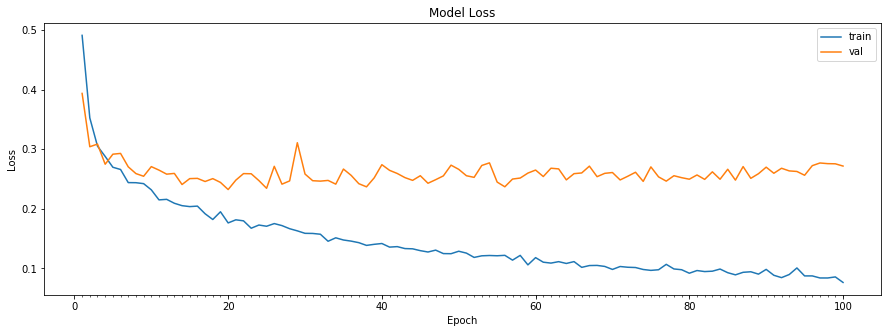

In [25]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(figsize=(15,5))
    axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs.set_title('Model Loss')
    axs.set_ylabel('Loss')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(model_info)

In [26]:
import sklearn
pred = model.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.6130034683908445
Mean Absolute Error (in g/litre):  0.4949899801483527
Root Mean Squared Error (in g/litre):  3.13025389428472


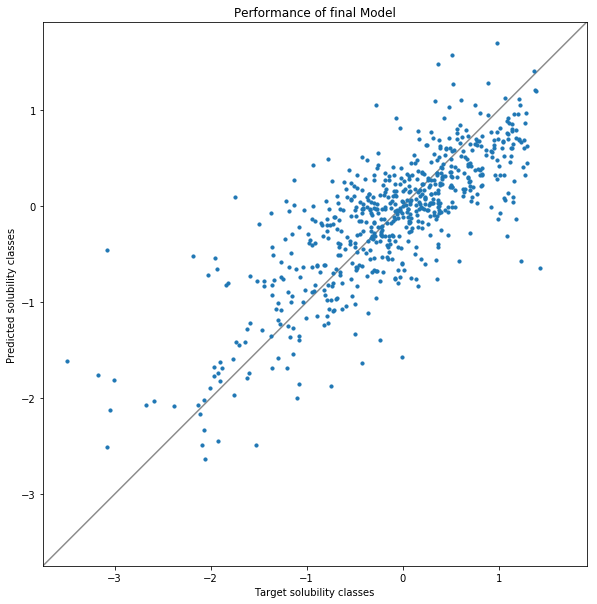

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,model.predict(X_test), s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# CNN

In [39]:
data_cnn = X_train[:,:100].reshape((X_train[:,:100].shape[0], 100, 1))
val_data_cnn = X_test[:,:100].reshape(X_test[:,:100].shape[0],100,1)
target = Y_train.reshape(Y_train.shape[0],1)
val_target = Y_test.reshape(Y_test.shape[0],1)
data_mw = X_train[:,-1].reshape((X_train[:,-1].shape[0],1))
val_data_mw = X_test[:,-1].reshape((X_test[:,-1].shape[0],1))
# val_target = Y_test

In [40]:
branch1 = Sequential()

branch1.add(Conv1D(2,3,activation='tanh',input_shape=(100, 1)))
branch1.add(Conv1D(4,3,activation='tanh'))
branch1.add(Conv1D(6,3,activation='tanh'))
branch1.add(Dropout(0.2))
branch1.add(Conv1D(8,3,activation='tanh'))
branch1.add(Conv1D(10,3,activation='relu'))
branch1.add(Flatten())
branch1.add(Dense(10))


branch2 = Sequential()
branch2.add(Dense(10,input_dim=1))
branch2.add(Dense(10,activation='linear'))
            
            
cnnmodel =Sequential()
cnnmodel.add(Merge([branch1, branch2], mode = 'concat'))
cnnmodel.add(Dense(1,activation='linear'))
cnnmodel.add(Dense(1,activation='linear'))

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [24]:
cnnmodel.compile(loss='mean_squared_error', optimizer='adam')
cnnmodel_info = cnnmodel.fit([data_cnn,data_mw], target, epochs=20, batch_size=100, verbose=2,
                          validation_data=([val_data_cnn,val_data_mw],val_target))

NameError: name 'cnnmodel' is not defined

In [99]:
import sklearn
pred = cnnmodel.predict([val_data_cnn,val_data_mw])
act = val_target
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.597962549453
Mean Absolute Error (in g/litre):  0.326776055304
Root Mean Squared Error (in g/litre):  1.281002269463329


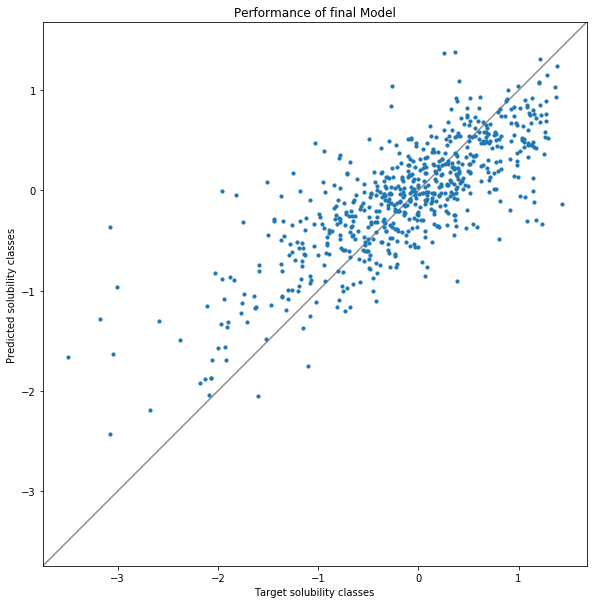

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(val_target,cnnmodel.predict([val_data_cnn,val_data_mw]), s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# RNN - Performs very poorly

In [61]:
# # The standard model
# # Here 50, the dimensionality of the output from LSTM is just a random no and has no suxh signifance, 
# # That ^^ shuould be search via a hyperparameter search

# branch1 = Sequential()
# # The a<final output> will have 50 numbers 
# branch1.add(LSTM(100, input_shape=(100, 1)))
# # branch1.add(Dropout(0.2))
# branch1.add(Dense(200,activation='tanh'))



# branch2 = Sequential()
# branch2.add(Dense(5,input_dim=1))
# rnnmodel =Sequential()
# rnnmodel.add(Merge([branch1, branch2], mode = 'concat'))
# rnnmodel.add(Dense(10,activation='relu'))
# rnnmodel.add(Dense(5,activation='linear'))
# rnnmodel.add(Dense(1,activation='linear'))

In [62]:
# rnnmodel.compile(loss='mean_squared_error', optimizer='rmsprop')
# rnnmodel_info = cnnmodel.fit([data_cnn,data_mw], target, epochs=100, batch_size=1000, verbose=2,
#                           validation_data=([val_data_cnn,val_data_mw],val_target))

In [63]:
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.scatter(val_target,rnnmodel.predict([val_data_cnn,val_data_mw]), s= 10)
# plt.xlabel('Target solubility classes')
# plt.ylabel('Predicted solubility classes')
# plt.title('Performance of final Model')
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
# plt.show()

# AutoSklearn

In [23]:
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics

# import autosklearn.regression

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# feature_types = (['numerical'] * 101)# + ['categorical'] + (['numerical'] * 9)

# automl = autosklearn.regression.AutoSklearnRegressor()
# #     time_left_for_this_task=120,
# #     per_run_time_limit=30,
# #     tmp_folder='/tmp/autosklearn_regression_example_tmp',
# #     output_folder='/tmp/autosklearn_regression_example_out',
# # )

# automl.fit(X_train, Y_train)#, dataset_name='molc',feat_type=feature_types)

# print(automl.show_models())
# predictions = automl.predict(X_test)
# print("R2 score:", sklearn.metrics.r2_score(Y_test, predictions))

In [24]:
import pickle
with open('auto_model.pkl','rb') as handle:
    automl = pickle.load(handle)

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Imputer from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator VarianceThreshold from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator SelectPercentile from version 0.19.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  U

In [100]:
import sklearn
pred = automl.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.654090017418
Mean Absolute Error (in g/litre):  0.306127788458
Root Mean Squared Error (in g/litre):  1.13155944277618


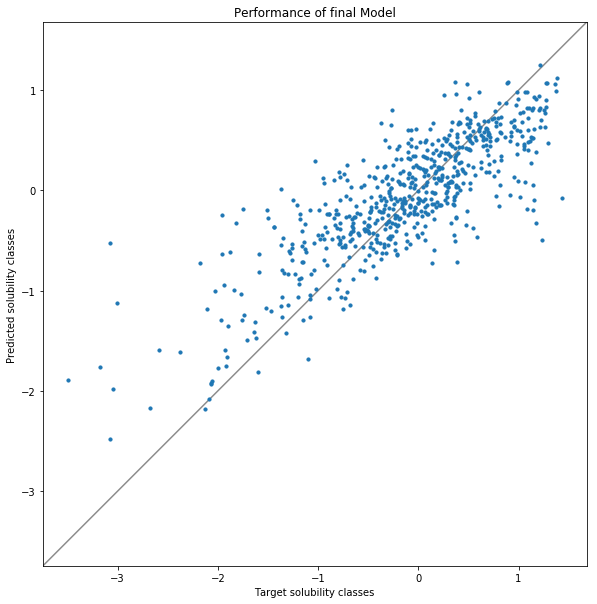

In [25]:
predictions = automl.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,predictions, s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

# SkNN

In [105]:
from sknn.mlp import Regressor, Layer
from sklearn.grid_search import RandomizedSearchCV,GridSearchCV
from scipy import stats


nn = Regressor(
    layers=[
        Layer("Rectifier", units=200),
        Layer("Rectifier", units=50),
        Layer("Linear", units=10),
        Layer("Linear")],
    learning_rate=0.002,
    n_iter=15)

# rs = RandomizedSearchCV(nn, param_distributions={
#     'learning_rate': stats.uniform(0.001, 0.005),
#     'hidden0__units': stats.randint(50, 200),
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]})

# gs = GridSearchCV(nn, param_grid={
#     'learning_rate': [0.005, 0.001],
#     'hidden0__units': [50, 100, 200],
#     'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]})

nn.fit(X_train, Y_train)

Regressor(batch_size=1, callback=None, debug=False, dropout_rate=None,
     f_stable=0.001,
     hidden0=<sknn.nn.Layer `Rectifier`: name='hidden0', units=200, frozen=False>,
     hidden1=<sknn.nn.Layer `Rectifier`: name='hidden1', units=50, frozen=False>,
     hidden2=<sknn.nn.Layer `Linear`: name='hidden2', units=10, frozen=False>,
     layers=[<sknn.nn.Layer `Rectifier`: name='hidden0', units=200, frozen=False>, <sknn.nn.Layer `Rectifier`: name='hidden1', units=50, frozen=False>, <sknn.nn.Layer `Linear`: name='hidden2', units=10, frozen=False>, <sknn.nn.Layer `Linear`: name='output', units=1, frozen=False>],
     learning_momentum=0.9, learning_rate=0.002, learning_rule='sgd',
     loss_type=None, n_iter=15, n_stable=10, normalize=None,
     output=<sknn.nn.Layer `Linear`: name='output', units=1, frozen=False>,
     parameters=None, random_state=None, regularize=None, valid_set=None,
     valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [106]:
import sklearn
pred = nn.predict(X_test)
act = Y_test
R2 = sklearn.metrics.r2_score(act, pred)
print("R2: ",R2)

r_act = sc_y.inverse_transform(np.array(act).reshape(-1, 1))
r_act = 10**r_act.reshape(-1,)

r_pred = sc_y.inverse_transform(np.array(pred).reshape(-1, 1))
r_pred = 10**r_pred.reshape(-1,)


RMSE = sqrt(sklearn.metrics.mean_squared_error(r_act,r_pred))
MAE = sklearn.metrics.mean_absolute_error(r_act,r_pred)

print('Mean Absolute Error (in g/litre): ', MAE)
print('Root Mean Squared Error (in g/litre): ', RMSE)

R2:  0.59807888513
Mean Absolute Error (in g/litre):  0.387457642652
Root Mean Squared Error (in g/litre):  1.559464562483134


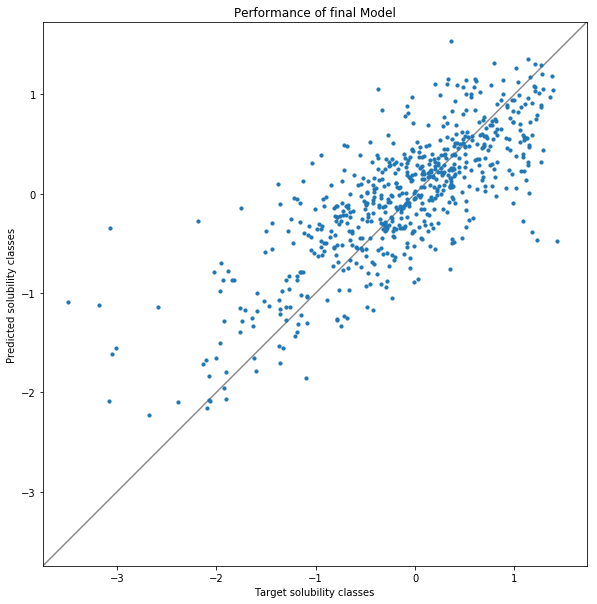

In [109]:
predictions = nn.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(Y_test,predictions, s= 10)
plt.xlabel('Target solubility classes')
plt.ylabel('Predicted solubility classes')
plt.title('Performance of final Model')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.45, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [ ]:
| ConvNet  | R2:  0.6282006384214354
Mean Absolute Error (in g/litre):  0.3070177533342374
Root Mean Squared Error (in g/litre):  1.1441674799207011 |
| -------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| DenseNet | R2:  0.6453372173722867
Mean Absolute Error (in g/litre):  0.37831501737500695
Root Mean Squared Error (in g/litre):  1.380492964248265 |